In [1]:
import pandas as pd
import numpy as np
import sklearn.datasets
import sklearn.metrics as metrics
# бібліотеки для візуалізації
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
import sklearn.metrics
# візуалізація границь рішень, встановлюється через:
# pip install git+https://github.com/PanWu/pylib.git
import pylib.plot

X, y = sklearn.datasets.make_moons(n_samples=(300, 300), noise=0.25, random_state=17)

In [2]:
def draw_moons(X, y):
    plt.figure(figsize=(11, 8))
    plt.scatter(
    X[:, 0],
    X[:, 1],
    c=y,
    s=100,
    cmap="winter",
    edgecolors="black",
    linewidth=1.5
    )
    plt.show()


In [3]:
def confussion_matrix(y_true, y_predicted):
    confussion = metrics.confusion_matrix(y_true, y_predicted)
    sns.heatmap(confussion, annot=True, fmt='g', cmap='Blues')
    print(f'accuracy: {metrics.accuracy_score(y_true, y_predicted)} \n \
    precision: {metrics.precision_score(y_true, y_predicted)} \n \
    recall: {metrics.recall_score(y_true, y_predicted)} \n \
    f1_score: {metrics.f1_score(y_true, y_predicted)}')

In [4]:
def pr_curve(y_true, y_predicted):
    precision, recall, _ = metrics.precision_recall_curve(y_true, y_predicted)
    print(f'auc pr curve: {metrics.auc(recall, precision)}')
    plt.plot(recall, precision)
    plt.title('Precision-Recall Curve', size=20)
    plt.xlabel('Recall', size=14)
    plt.ylabel('Precision', size=14)

In [5]:
def roc_curve(y_true, y_predicted):
    fpr, tpr, _ = metrics.roc_curve(y_true, y_predicted)
    print(f'roc auc:{metrics.roc_auc_score(y_true, y_predicted)}')
    plt.plot(fpr, tpr)
    plt.title('ROC curve', size=20)
    plt.xlabel('False positive rate', size=14)
    plt.ylabel('True positive rate', size=14)


In [6]:
def gridsearchscore(model_gs):
    print(f'Best score: {model_gs.best_score_}, Best parameters: {model_gs.best_params_}')

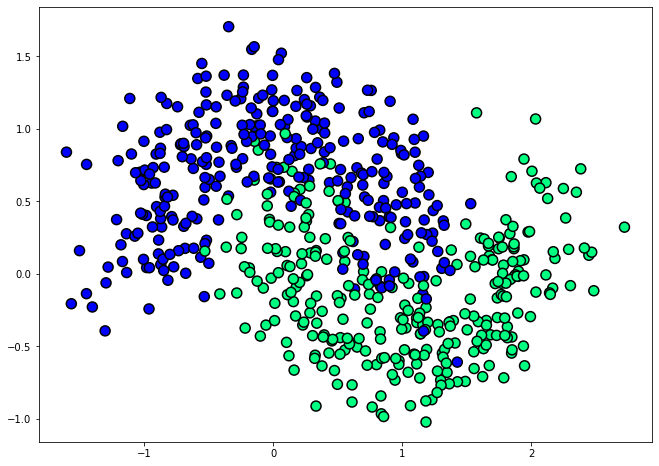

In [7]:
draw_moons(X, y)

In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y,
                     test_size=0.2,
                     random_state=17)

<b>Одношарова: </b>

<b> Зі звичайними параметрами: </b>

In [9]:
model_perc = MLPClassifier(max_iter=100000)

In [10]:
model_perc.fit(X_train, y_train)

MLPClassifier(max_iter=100000)

(<Figure size 432x432 with 1 Axes>, None, None)

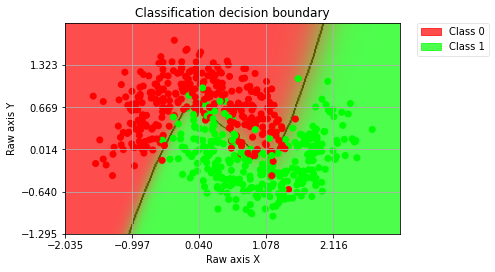

In [11]:
pylib.plot.plot_decision_boundary(model_perc, X=X, Y=y)

In [12]:
predict = model_perc.predict(X_test)

accuracy: 0.875 
     precision: 0.8703703703703703 
     recall: 0.8545454545454545 
     f1_score: 0.8623853211009175


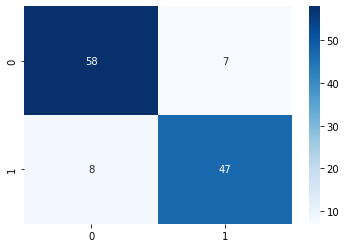

In [13]:
confussion_matrix(y_test, predict)

auc pr curve: 0.8957912457912457


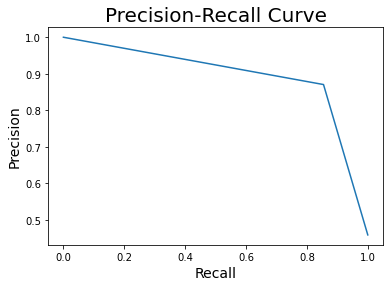

In [14]:
pr_curve(y_test, predict)

roc auc:0.8734265734265734


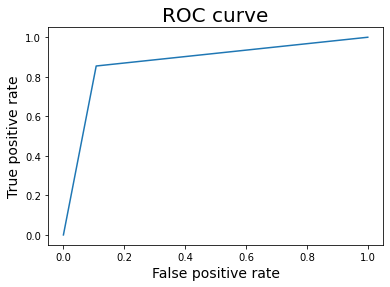

In [15]:
roc_curve(y_test, predict)

In [16]:
predict = model_perc.predict(X_train)

accuracy: 0.9291666666666667 
     precision: 0.934156378600823 
     recall: 0.926530612244898 
     f1_score: 0.9303278688524591


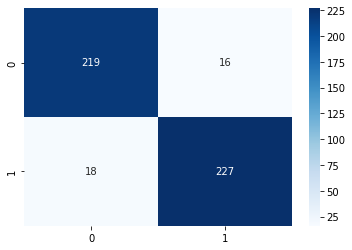

In [17]:
confussion_matrix(y_train, predict)

auc pr curve: 0.9490934954228605


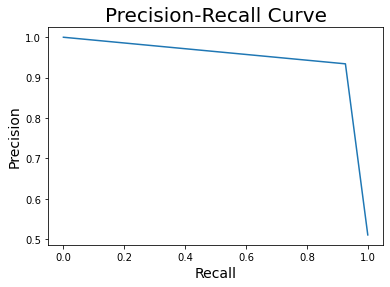

In [18]:
pr_curve(y_train, predict)

roc auc:0.9292227529309597


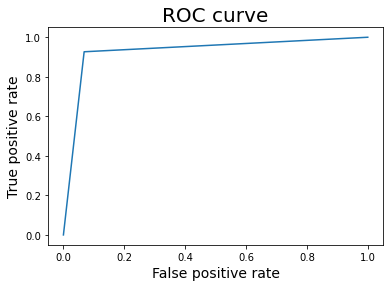

In [19]:
roc_curve(y_train, predict)

Значення метрик достатні, спробуємо їх покращити змінивши гіперпараметри

<b>Налаштування параметру альфа: </b>

In [20]:
from sklearn.model_selection import GridSearchCV

parameters = {'alpha': [0.01, 0.1, 1, 2, 5, 10]}

model_perc_gs = GridSearchCV(model_perc,
                             parameters,
                             scoring='accuracy',
                             cv=5, n_jobs=-1)

In [21]:
model_perc_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=100000), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1, 2, 5, 10]},
             scoring='accuracy')

In [22]:
gridsearchscore(model_perc_gs)

Best score: 0.9166666666666666, Best parameters: {'alpha': 0.01}


(<Figure size 432x432 with 1 Axes>, None, None)

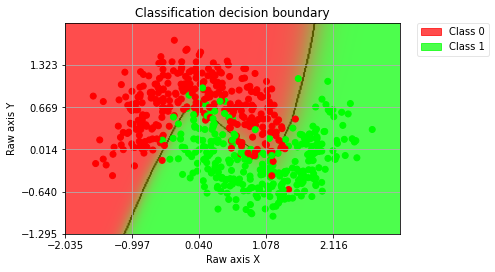

In [23]:
pylib.plot.plot_decision_boundary(model_perc_gs, X=X, Y=y)

In [24]:
predict = model_perc_gs.predict(X_test)

accuracy: 0.8833333333333333 
     precision: 0.8867924528301887 
     recall: 0.8545454545454545 
     f1_score: 0.8703703703703703


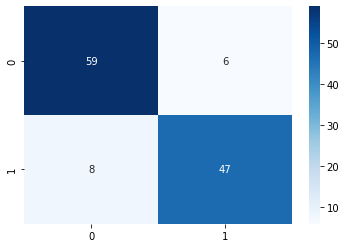

In [25]:
confussion_matrix(y_test, predict)

auc pr curve: 0.9040022870211549


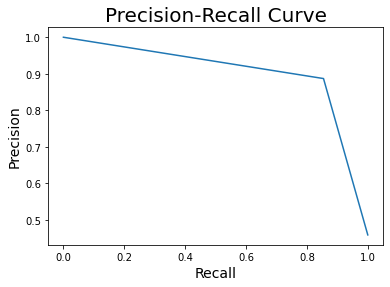

In [26]:
pr_curve(y_test, predict)

roc auc:0.8811188811188811


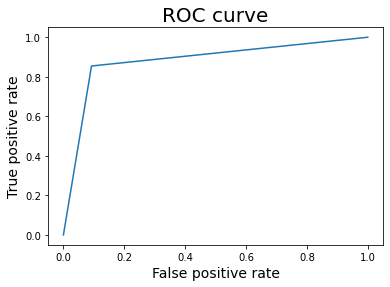

In [27]:
roc_curve(y_test, predict)

In [28]:
predict = model_perc_gs.predict(X_train)

accuracy: 0.9291666666666667 
     precision: 0.9306122448979591 
     recall: 0.9306122448979591 
     f1_score: 0.9306122448979591


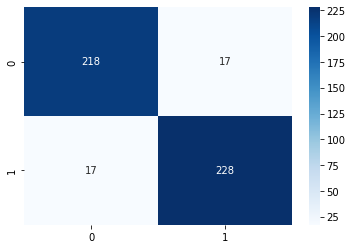

In [29]:
confussion_matrix(y_train, predict)

auc pr curve: 0.9483205782312925


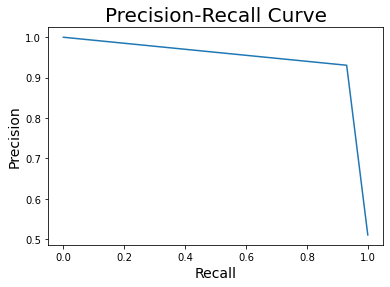

In [30]:
pr_curve(y_train, predict)

roc auc:0.9291359096830222


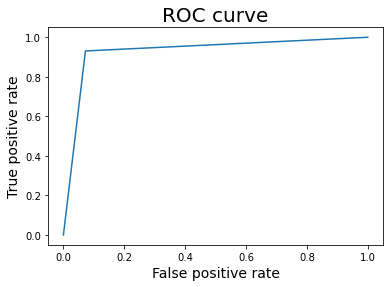

In [31]:
roc_curve(y_train, predict)

In [32]:
parameters = {'hidden_layer_sizes': [(10, ), (50, ), (100, ), (150, )]}

model_perc_gs = GridSearchCV(model_perc,
                             parameters,
                             scoring='accuracy',
                             cv=5, n_jobs=-1)

In [33]:
model_perc_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=100000), n_jobs=-1,
             param_grid={'hidden_layer_sizes': [(10,), (50,), (100,), (150,)]},
             scoring='accuracy')

In [34]:
gridsearchscore(model_perc_gs)

Best score: 0.9229166666666666, Best parameters: {'hidden_layer_sizes': (100,)}


(<Figure size 432x432 with 1 Axes>, None, None)

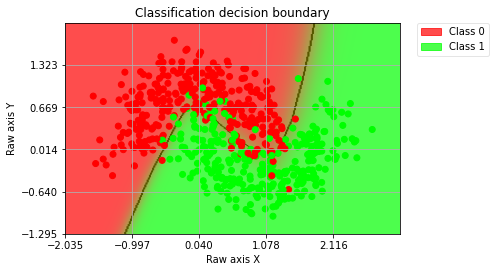

In [35]:
pylib.plot.plot_decision_boundary(model_perc_gs, X=X, Y=y)

In [36]:
predict = model_perc_gs.predict(X_test)

accuracy: 0.875 
     precision: 0.8846153846153846 
     recall: 0.8363636363636363 
     f1_score: 0.8598130841121494


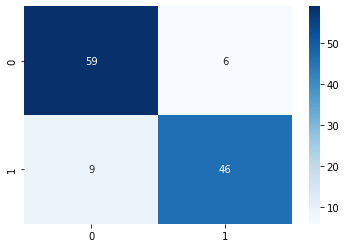

In [37]:
confussion_matrix(y_test, predict)

auc pr curve: 0.8979895104895105


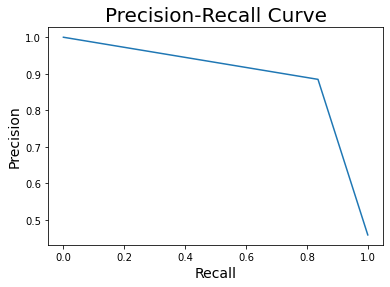

In [38]:
pr_curve(y_test, predict)

roc auc:0.872027972027972


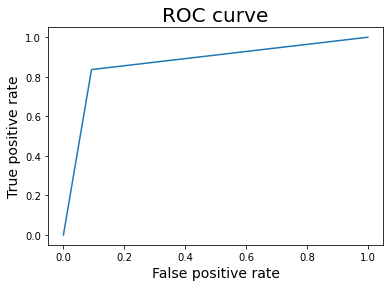

In [39]:
roc_curve(y_test, predict)

In [40]:
predict = model_perc_gs.predict(X_train)

accuracy: 0.9291666666666667 
     precision: 0.9306122448979591 
     recall: 0.9306122448979591 
     f1_score: 0.9306122448979591


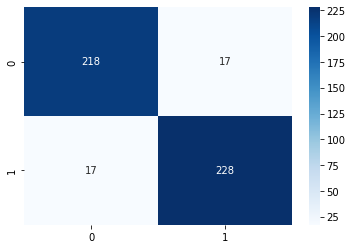

In [41]:
confussion_matrix(y_train, predict)

auc pr curve: 0.9483205782312925


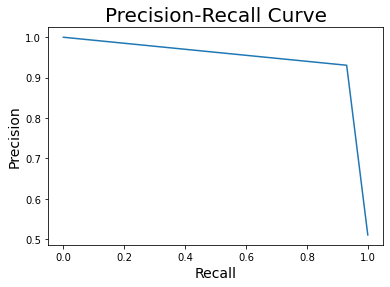

In [42]:
pr_curve(y_train, predict)

roc auc:0.9291359096830222


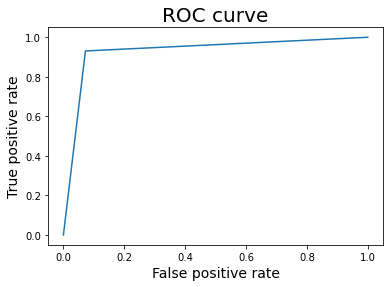

In [43]:
roc_curve(y_train, predict)

Спробуємо знайти кращі налаштування гіперпараметрів через RandomizedSearchCV

In [44]:
from sklearn.model_selection import RandomizedSearchCV

parameters = {'alpha': [0.1, 1, 2, 5, 10], \
            'hidden_layer_sizes': [(50,), (100, ), (150, )]}

model_perc_gs = GridSearchCV(model_perc,
                             parameters,
                             scoring='accuracy',
                             cv=5, n_jobs=-1)

In [45]:
model_perc_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=100000), n_jobs=-1,
             param_grid={'alpha': [0.1, 1, 2, 5, 10],
                         'hidden_layer_sizes': [(50,), (100,), (150,)]},
             scoring='accuracy')

In [46]:
gridsearchscore(model_perc_gs)

Best score: 0.9166666666666666, Best parameters: {'alpha': 0.1, 'hidden_layer_sizes': (50,)}


(<Figure size 432x432 with 1 Axes>, None, None)

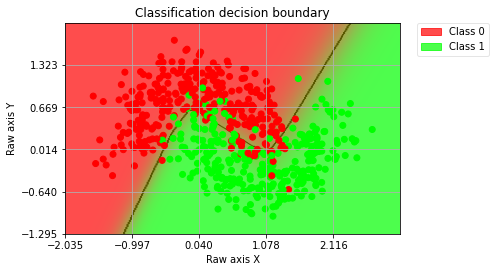

In [47]:
pylib.plot.plot_decision_boundary(model_perc_gs, X=X, Y=y)

In [48]:
predict = model_perc_gs.predict(X_test)

accuracy: 0.8916666666666667 
     precision: 0.8888888888888888 
     recall: 0.8727272727272727 
     f1_score: 0.8807339449541284


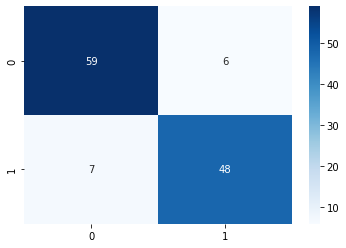

In [49]:
confussion_matrix(y_test, predict)

auc pr curve: 0.9099747474747475


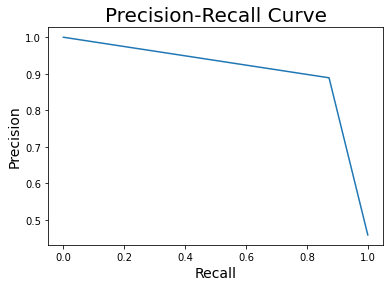

In [50]:
pr_curve(y_test, predict)

roc auc:0.8902097902097901


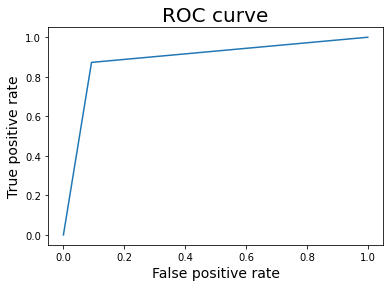

In [51]:
roc_curve(y_test, predict)

In [52]:
predict = model_perc_gs.predict(X_train)

accuracy: 0.91875 
     precision: 0.9186991869918699 
     recall: 0.9224489795918367 
     f1_score: 0.9205702647657841


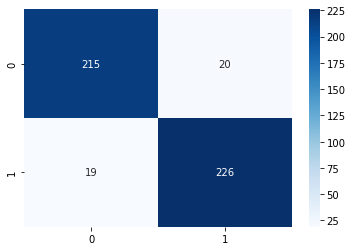

In [53]:
confussion_matrix(y_train, predict)

auc pr curve: 0.94036574995852


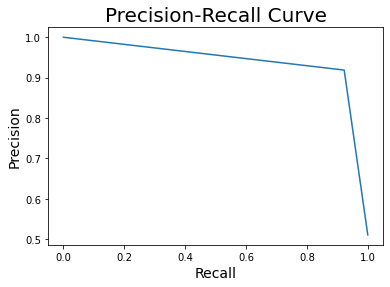

In [54]:
pr_curve(y_train, predict)

roc auc:0.9186712983065566


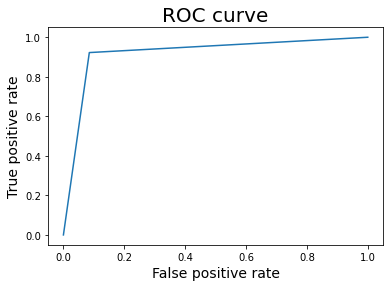

In [55]:
roc_curve(y_train, predict)

Завдяки графічно представленній границі рішень ми бачимо, що модель гарно показує себе на цьому датасеті, ми не можемо отримати значення метрик вище через noise=0.25 <br>
Розглянемо двошарову задля того щоб довести це

<b> Двошарова: </b>

In [68]:
parameters = {'alpha': [0.1, 1, 2], \
              'hidden_layer_sizes': [(100, 50), (50, 100), (100, 100), (50, 50)]}


model_perc_gs = GridSearchCV(model_perc,
                             parameters,
                             scoring='accuracy',
                             cv=5, n_jobs=-1)

In [69]:
model_perc_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=100000), n_jobs=-1,
             param_grid={'alpha': [0.1, 1, 2],
                         'hidden_layer_sizes': [(100, 50), (50, 100),
                                                (100, 100), (50, 50)]},
             scoring='accuracy')

In [70]:
gridsearchscore(model_perc_gs)

Best score: 0.91875, Best parameters: {'alpha': 1, 'hidden_layer_sizes': (100, 50)}


(<Figure size 432x432 with 1 Axes>, None, None)

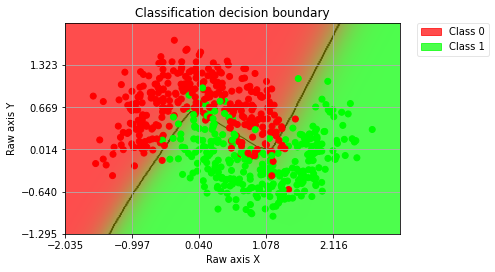

In [71]:
pylib.plot.plot_decision_boundary(model_perc_gs, X=X, Y=y)

In [72]:
predict = model_perc_gs.predict(X_test)

accuracy: 0.8916666666666667 
     precision: 0.8888888888888888 
     recall: 0.8727272727272727 
     f1_score: 0.8807339449541284


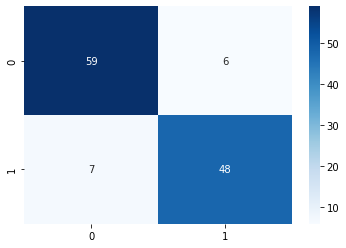

In [73]:
confussion_matrix(y_test, predict)

auc pr curve: 0.9099747474747475


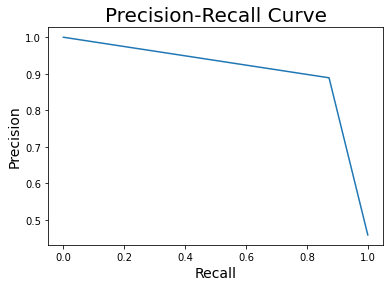

In [74]:
pr_curve(y_test, predict)

roc auc:0.8902097902097901


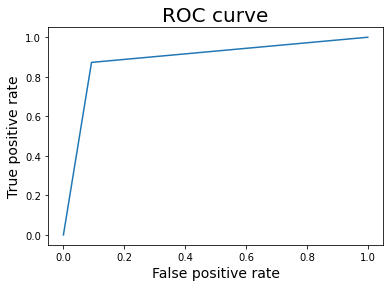

In [75]:
roc_curve(y_test, predict)

In [76]:
predict = model_perc_gs.predict(X_train)

accuracy: 0.9208333333333333 
     precision: 0.9156626506024096 
     recall: 0.9306122448979591 
     f1_score: 0.923076923076923


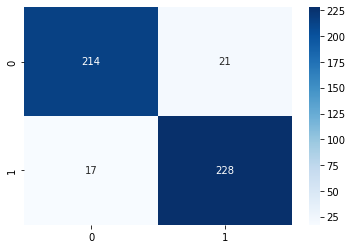

In [77]:
confussion_matrix(y_train, predict)

auc pr curve: 0.9408457810835177


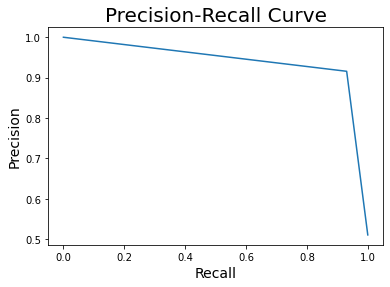

In [78]:
pr_curve(y_train, predict)

roc auc:0.9206252713851497


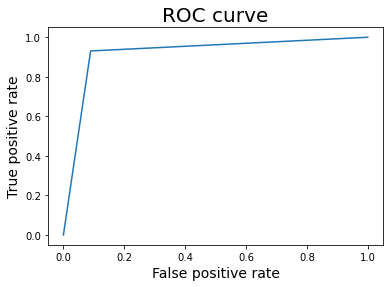

In [79]:
roc_curve(y_train, predict)

В результаті отримали, що одношарової було достатньо, модель гарно побудувала границю рішень і отримала мабуть найвище значення метрик яке тільки можна було отримати. <br>
